---
title: "Fourier transform"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## basic wave concepts

The function

$$
f(t) = B\sin(2\pi f t)
$$ {#eq-sin-Bf}

has two basic characteristics, its amplitude $B$ and frequency $f$.

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set(style="ticks", font_scale=1.5)

# %matplotlib widget

# Configure Matplotlib to use LaTeX font
plt.rcParams.update({
    "xtick.labelsize": 14,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

In [12]:
#| code-summary: "data to plot"
T = 2.0  # s
f = 1.0 / T
n_periods = 2.5
dt = 0.01
B = 0.6
t = np.arange(0, T*n_periods + dt, dt)
s = B * np.sin(2.0 * np.pi * f * t)
c = B * np.cos(2.0 * np.pi * f * t)

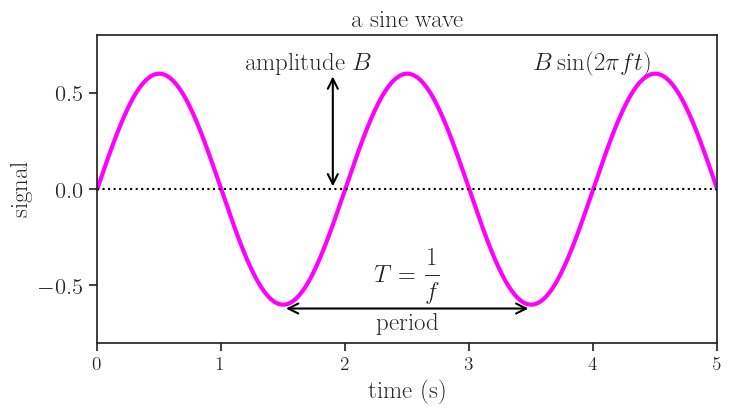

In [7]:
#| code-summary: "plot"
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, s, color="magenta", lw=3)
ax.plot(t, 0*t, color="black", ls=":")
ax.annotate("",
            xy=(1.9, 0.0), xycoords='data',
            xytext=(1.9, 0.6), textcoords='data',
            color="black",
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3",
                            color="black",
                            lw=1.5),
            )
ax.annotate("",
            xy=(1.5, -0.62), xycoords='data',
            xytext=(3.5, -0.62), textcoords='data',
            color="black",
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3",
                            color="black",
                            lw=1.5),
            )
ax.text(1.7, 0.62, r"amplitude $B$", ha="center")
ax.text(2.5, -0.73, r"period", ha="center")
ax.text(2.5, -0.48, r"$T=\displaystyle\frac{1}{f}$", ha="center")
ax.text(4.0, 0.62, r"$B\sin(2\pi ft)$", ha="center")
ax.set(xlim=[t[0], t[-1]],
       ylim=[-0.8, 0.8],
       title="a sine wave",
       xlabel="time (s)",
       ylabel="signal");
# fig.savefig("sine1.png", dpi=300, bbox_inches="tight")

In the figure above, the amplitude $B=0.6$ and we see that the distance between two peaks is called period, $T=2$ s. The frequency is defined as the inverse of the period:

$$
f = \frac{1}{T}.
$$ {#eq-fT}

When time is in seconds, then the frequency is measured in Hertz (Hz). For the graph above, therefore, we see a wave whose frequency is $f = 1/(2 \text{ s}) = 0.5$ Hz.

In the figure below, we see what happens when we vary the values of the frequency and amplitude.

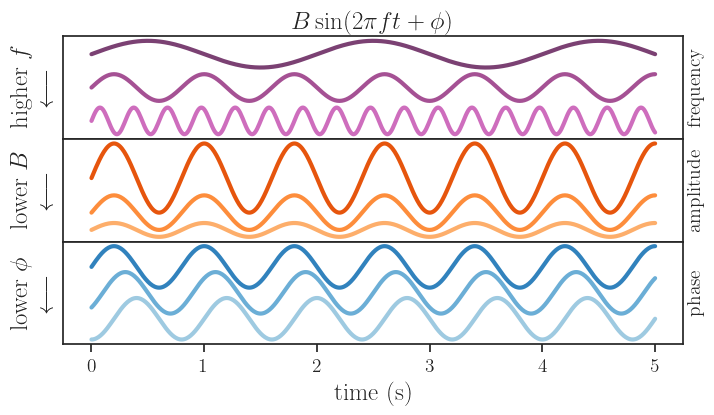

In [11]:
t20b = mpl.colormaps['tab20b']
t20c = mpl.colormaps['tab20c']

fig, ax = plt.subplots(3, 1, figsize=(8,4), sharex=True)
fig.subplots_adjust(
                    hspace=0.0, wspace=0.02)
A = 0.4

s = A * np.sin(2.0 * np.pi * (1/2.0) * t)
ax[0].plot(t, s, color=t20b.colors[16], lw=3)
s = A * np.sin(2.0 * np.pi * (1/0.8) * t) - 1
ax[0].plot(t, s, color=t20b.colors[17], lw=3)
s = A * np.sin(2.0 * np.pi * (1/0.3) * t) - 2
ax[0].plot(t, s, color=t20b.colors[18], lw=3)

s = 1 * np.sin(2.0 * np.pi * (1/0.8) * t)
ax[1].plot(t, s, color=t20c.colors[4], lw=3)
s = 0.5 * np.sin(2.0 * np.pi * (1/0.8) * t) - 1
ax[1].plot(t, s, color=t20c.colors[5], lw=3)
s = 0.2 * np.sin(2.0 * np.pi * (1/0.8) * t) - 1.5
ax[1].plot(t, s, color=t20c.colors[6], lw=3)

s = A * np.sin(2.0 * np.pi * (1/0.8) * t)
ax[2].plot(t, s, color=t20c.colors[0], lw=3)
s = A * np.sin(2.0 * np.pi * (1/0.8) * t - np.pi/4) - 0.5
ax[2].plot(t, s, color=t20c.colors[1], lw=3)
s = A * np.sin(2.0 * np.pi * (1/0.8) * t - 2*np.pi/4) - 1
ax[2].plot(t, s, color=t20c.colors[2], lw=3)

ax[0].text(1.02, 0.5, "frequency", transform=ax[0].transAxes,
         horizontalalignment='center', verticalalignment='center',
         fontweight="bold", fontsize=14,
         rotation=90)
ax[1].text(1.02, 0.5, "amplitude", transform=ax[1].transAxes,
         horizontalalignment='center', verticalalignment='center',
         fontweight="bold", fontsize=14,
         rotation=90)
ax[2].text(1.02, 0.5, "phase", transform=ax[2].transAxes,
         horizontalalignment='center', verticalalignment='center',
         fontweight="bold", fontsize=14,
         rotation=90)


ax[0].set(title=r"$B\sin(2\pi ft+\phi)$",
          yticks=[],
          ylabel=r"higher $f$"+"\n"+r"$\longleftarrow$")
ax[1].set(yticks=[],
          ylabel=r"lower $B$"+"\n"+r"$\longleftarrow$")
ax[2].set(xlabel="time (s)",
          yticks=[],
          ylabel=r"lower $\phi$"+"\n"+r"$\longleftarrow$");
# fig.savefig("sine2.png", dpi=300, bbox_inches="tight")

The graph above introduces two new characteristics of a wave, its phase $\phi$, and its offset $B$. A more general description of a sine wave is

$$
f(t) = B\sin(2\pi f t + \phi) + B_0.
$$ {#eq-sin-Bf-phi}

The offset $B_0$ moves the wave up and down, while changing the value of $\phi$ makes the sine wave move left and right. When the phase $\phi=2\pi$, the sine wave will have shifted a full period, and the resulting wave is identical to the original:

$$
B\sin(2\pi f t) = B\sin(2\pi f t + 2\pi).
$$ {#eq-sin-Bf-phi-2pi}

All the above can also be said about a cosine, whose general form can be given as

$$
A\cos(2\pi f t + \phi) + A_0
$$ {#eq-sin-Af-phi}

One final point before we jump into the deep waters is that the sine and cosine functions are related through a simple phase shift:

$$
\cos\left(2\pi f t + \frac{\pi}{2}\right) = \sin\left(2\pi f t\right)
$$

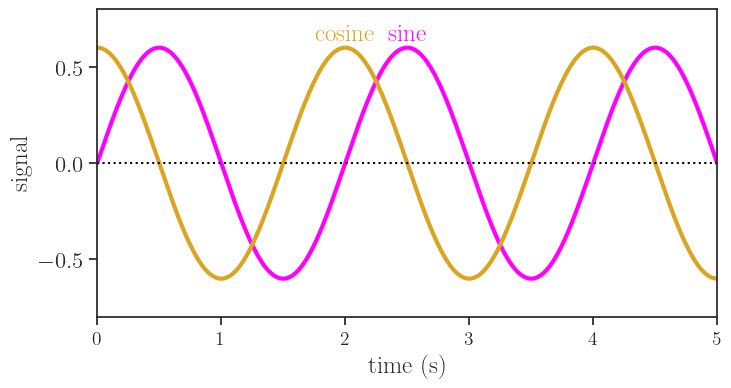

In [20]:
#| code-summary: "plot sine and cosine"
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, s, color="magenta", lw=3)
ax.plot(t, c, color="goldenrod", lw=3)
ax.plot(t, 0*t, color="black", ls=":")
ax.text(2.5, 0.64, "sine", ha="center", color="magenta")
ax.text(2.0, 0.64, "cosine", ha="center", color="goldenrod")
ax.set(xlim=[t[0], t[-1]],
       ylim=[-0.8, 0.8],
       xlabel="time (s)",
       ylabel="signal");


## Fourier's theorem

Fourier's theorem states that

> Any periodic signal is composed of a superposition of pure sine waves, with suitably chosen amplitudes and phases, whose frequencies are harmonics of the fundamental frequency of the signal.


## Fourier series

> a periodic function can be described as a sum of sines and cosines.

The most common way of representing the Fourier series is
$$
f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\infty}a_n\cos(nt) + \sum_{n=1}^{\infty}b_n\sin(nt)
$$ {#eq-fseries}

::: {.column-margin}
for a periodic function $f(t)$ in the interval $-\pi<t<\pi$, where

$$
\begin{split}
a_0 &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)dt\\
a_n &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)\cos(nt)dt\\
b_n &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)\sin(nt)dt\\
\end{split}
$$ {#eq-fseries-coeff}

<!-- Not any function, but certainly most functions we will deal with in this course. The function has to fullful the [Dirichlet conditions](https://en.wikipedia.org/wiki/Dirichlet–Jordan_test) -->
:::

Let's see some excellent visual demonstrations.
The classic examples are usually the square function and the sawtooth function:

Source: <https://www.geogebra.org/m/tkajbzmg>
<iframe scrolling="no" title="Fourier Series" src="https://www.geogebra.org/material/iframe/id/yd2qcp97/width/791/height/469/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/true/rc/false/ld/false/sdz/true/ctl/false" width="791px" height="469px" style="border:0px;"> </iframe>

Source: <https://www.geogebra.org/m/k4eq4fkr> 
<iframe scrolling="no" title="2.2.2. Fourier-Reihe periodischer Funktionen" src="https://www.geogebra.org/material/iframe/id/wzawveyr/width/1117/height/560/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/true/rc/false/ld/true/sdz/true/ctl/false" width="1117px" height="560px" style="border:0px;"> </iframe>

We can take advantage of complex numbers to rewrite the Fourier series in a more compact and elegant way:

$$
f(t) = \sum_{n=-\infty}^{\infty} c_n e^{2\pi i \frac{n}{P} t}
$$

for a periodic function between $-\frac{P}{2}\le t \le\frac{P}{2}$, and the coefficients are given by

$$
c_n = \frac{1}{P}\int_{-\frac{P}{2}}^{\frac{P}{2}}f(t) e^{- 2\pi i \frac{n}{P} t}dt.
$$

If you are not familiar with complex numbers, or you need a refresher, visit [Dennis Sun's excellent "Introduction to Probability" webpage](https://dlsun.github.io/probability/complex.html){target="_blank"}.

The series expressed as a sum of sines and cosines could be translated into an expression of a complex exponential by taking advantage of Euler's formula:

$$
e^{ix} = \cos(x) + i\sin(x)
$$

<iframe src="https://www.geogebra.org/classic/n9mjgqps?embed" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>


## Fourier transform

This is a generalization of a Fourier series, but for non-periodic signals. If we take the limit $P\rightarrow\infty$ in the equations above, we have that

$$
f(t) = \int_{-\infty}^{\infty} F(k) e^{2\pi i k t}dk,
$$

where $F(k)$ now takes the role of the coefficients from before, and it is given by

$$
F(k) = \int_{-\infty}^{\infty} f(t) e^{-2\pi i k t}dk.
$$

If $t$ is in seconds, the frequency $k$ is given in Hertz (Hz).

See the following animations to visualize the theorem in action.

<a href="https://commons.wikimedia.org/wiki/File:Fourier_series_and_transform.gif#/media/File:Fourier_series_and_transform.gif"><img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif" alt="Fourier series and transform.gif" height="480" width="600"></a>  
Source: <https://en.wikipedia.org/wiki/File:Fourier_series_and_transform.gif>

<a href="https://commons.wikimedia.org/wiki/File:Fourier_synthesis_square_wave_animated.gif"><img width="512" alt="Fourier synthesis square wave animated" src="https://upload.wikimedia.org/wikipedia/commons/a/af/Fourier_synthesis_square_wave_animated.gif"></a>  
Source: <https://commons.wikimedia.org/wiki/File:Fourier_synthesis_square_wave_animated.gif>

<a href="https://commons.wikimedia.org/wiki/File:Sawtooth_Fourier_Animation.gif"><img width="512" alt="Sawtooth Fourier Animation" src="https://upload.wikimedia.org/wikipedia/commons/b/b7/Sawtooth_Fourier_Animation.gif"></a>  
Source: <https://commons.wikimedia.org/wiki/File:Sawtooth_Fourier_Animation.gif>



<a href="https://commons.wikimedia.org/wiki/File:Continuous_Fourier_transform_of_rect_and_sinc_functions.gif"><img width="512" alt="Continuous Fourier transform of rect and sinc functions" src="https://upload.wikimedia.org/wikipedia/commons/a/a3/Continuous_Fourier_transform_of_rect_and_sinc_functions.gif"></a>  
Source: [Wikimedia](https://commons.wikimedia.org/wiki/File:Continuous_Fourier_transform_of_rect_and_sinc_functions.gif)



## fun calculation of a Fourier series

Let's calculate the Fourier series of the periodic function $f(t)$ over the domain $-\pi<t<\pi$:

$$
f(t)=
\begin{cases}
1, & \text{if } -\frac{\pi}{2}<t<\frac{\pi}{2}\\
0, & \text{otherwise}
\end{cases}
$$

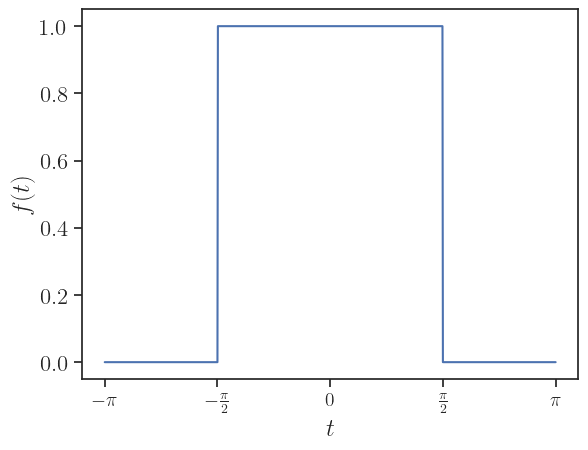

In [10]:
pi = np.pi
t = np.linspace(-pi,pi,1001)
f = np.zeros(len(t))
mask = np.where(np.abs(t)<pi/2)
f[mask] = 1.0

fig, ax = plt.subplots()
ax.plot(t, f)
ax.set(xlabel=r"$t$",
       ylabel=r"$f(t)$",
       xticks=[-pi,-pi/2,0,pi/2,pi],
       xticklabels=[r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$']);

Using the equations of the Fourier series (@eq-fseries and @eq-fseries-coeff), we can calculate the first coefficient $a_0$:

$$
\begin{split}
a_0 &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)dt \\
    &= \frac{1}{\pi}\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}1\cdot dt \\
    &= \frac{1}{\pi} \Big[ t \Big]_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \\
    &= \frac{1}{\pi} \Big[ \frac{\pi}{2} - (-\frac{\pi}{2}) \Big] \\
    &= \frac{1}{\pi} \Big[ \pi \Big] \\
    &= 1
\end{split}
$$


The coefficients $a_n$ are:
$$
\begin{split}
a_n &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)\cos(nt)dt \\
    &= \frac{1}{\pi}\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}\cos(nt) dt \\
    &= \frac{1}{\pi} \Big[ \frac{\sin(nt)}{n} \Big]_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \\
    &= \frac{1}{n\pi} \Big[ \sin\left(n\frac{\pi}{2}\right) - \sin\left(-n\frac{\pi}{2}\right) \Big] \\
    &\text{because }\sin(-a) = -\sin(a) \\
    &= \frac{2}{n\pi}  \sin\left(n\frac{\pi}{2}\right) \\
\end{split}
$$

Finally, the coefficients $b_n$ are:
$$
\begin{split}
b_n &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)\sin(nt)dt \\
    &= \frac{1}{\pi}\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}\sin(nt) dt \\
    &= \frac{1}{\pi} \Big[ -\frac{\cos(nt)}{n} \Big]_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \\
    &= -\frac{1}{n\pi} \Big[ \cos\left(n\frac{\pi}{2}\right) - \cos\left(-n\frac{\pi}{2}\right) \Big] \\
    &\text{because }\cos(-a) = \cos(a) \\
    &= -\frac{1}{n\pi} \Big[ \cos\left(n\frac{\pi}{2}\right) - \cos\left(n\frac{\pi}{2}\right) \Big] \\
    &= 0
\end{split}
$$

Let's put all this together:

$$
\begin{split}
f(t) &= \frac{1}{2}a_0 + \sum_{n=1}^{\infty}a_n\cos(nt) + \sum_{n=1}^{\infty}b_n\sin(nt) \\
     &= \frac{1}{2} + \sum_{n=1}^{\infty}\frac{2}{n\pi}  \sin\left(n\frac{\pi}{2}\right)\cos(nt)
\end{split}
$$

Note that for even values of $n=2k$, we have

$$
\sin\left(2k\frac{\pi}{2}\right) = \sin\left(k\pi\right) = 0
$$

We are left only with the odd values of $n$, so let's apply the following substitution:

$$
n \longrightarrow 2k+1
$$

Then our series for $f(t)$ can be expressed as

$$
f(t) = \frac{1}{2} + \sum_{k=0}^{\infty}\frac{2}{(2k+1)\pi}  \sin\left((2k+1)\frac{\pi}{2}\right)\cos((2k+1)t)
$$

Finally, note that when $k=0,2,4,6,...$

$$
\sin\left((2k+1)\frac{\pi}{2}\right) = 1
$$

and when $k=1,3,5,7,...$

$$
\sin\left((2k+1)\frac{\pi}{2}\right) = -1
$$

so we can simply write

$$
\sin\left((2k+1)\frac{\pi}{2}\right) = (-1)^k
$$

for any value of $k=0,1,2,3,...$.

The result of all this is

$$
f(t) = \frac{1}{2} + \sum_{k=0}^{\infty}\frac{2}{(2k+1)\pi}  (-1)^k \cos((2k+1)t)
$$

<iframe src="https://www.geogebra.org/classic/vdraqcwr?embed" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Wasn't this fun?